<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучим-данные" data-toc-modified-id="Изучим-данные-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучим данные</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Изучим-и-заполним-пропущенные-значения" data-toc-modified-id="Изучим-и-заполним-пропущенные-значения-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Изучим и заполним пропущенные значения</a></span></li><li><span><a href="#Приведем-данные-к-корректным-типам" data-toc-modified-id="Приведем-данные-к-корректным-типам-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Приведем данные к корректным типам</a></span></li><li><span><a href="#Устраним-неявные-дубликаты" data-toc-modified-id="Устраним-неявные-дубликаты-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Устраним неявные дубликаты</a></span></li><li><span><a href="#Устраним-редкие-и-выбивающиеся-значения" data-toc-modified-id="Устраним-редкие-и-выбивающиеся-значения-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Устраним редкие и выбивающиеся значения</a></span></li><li><span><a href="#Добавим-в-таблицу-новые-признаки" data-toc-modified-id="Добавим-в-таблицу-новые-признаки-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Добавим в таблицу новые признаки</a></span></li></ul></li><li><span><a href="#Проведем-исследовательский-анализ-данных" data-toc-modified-id="Проведем-исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Проведем исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Изучим--параметры-объектов:" data-toc-modified-id="Изучим--параметры-объектов:-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучим  параметры объектов:</a></span></li><li><span><a href="#Оценим-время-продажи-квартиры:" data-toc-modified-id="Оценим-время-продажи-квартиры:-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Оценим время продажи квартиры:</a></span></li><li><span><a href="#Оценим-влияние-различных-фаторов-на-(полную)-стоимость-объекта" data-toc-modified-id="Оценим-влияние-различных-фаторов-на-(полную)-стоимость-объекта-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Оценим влияние различных фаторов на (полную) стоимость объекта</a></span></li><li><span><a href="#Оценим-стоимость-квадратного-метра-по-населенным-пунктам" data-toc-modified-id="Оценим-стоимость-квадратного-метра-по-населенным-пунктам-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Оценим стоимость квадратного метра по населенным пунктам</a></span></li><li><span><a href="#Оценим-стоимость-каждого-километра-в-Санкт-Петербурге" data-toc-modified-id="Оценим-стоимость-каждого-километра-в-Санкт-Петербурге-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Оценим стоимость каждого километра в Санкт-Петербурге</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

**Задание**

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

# Изучим данные

In [1]:
#импортируем необходимые библиотеки
import pandas as pd
import matplotlib.pyplot as plt 

import plotly

!pip install missingno
import missingno as msno

**Откроем файл с данными и изучим общую информацию**

In [2]:
pd.options.display.max_rows = 400

#прочитаем данные из файла
#в качестве разделителя используется знак табуляции
try:
    spb_realty_raw = pd.read_csv('/datasets/real_estate_data.csv',sep='\t')
except:
    spb_realty_raw = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv',sep='\t')
    
#сохраним копию исходных данных на случай, если в последствии захочется сравнить статистику исходной и обработанной выборки данных
spb_realty = spb_realty_raw.copy()

In [3]:
#ознакомимся с данными
spb_realty.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


In [4]:
#Изучим общую информацию о датафрейме
spb_realty.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

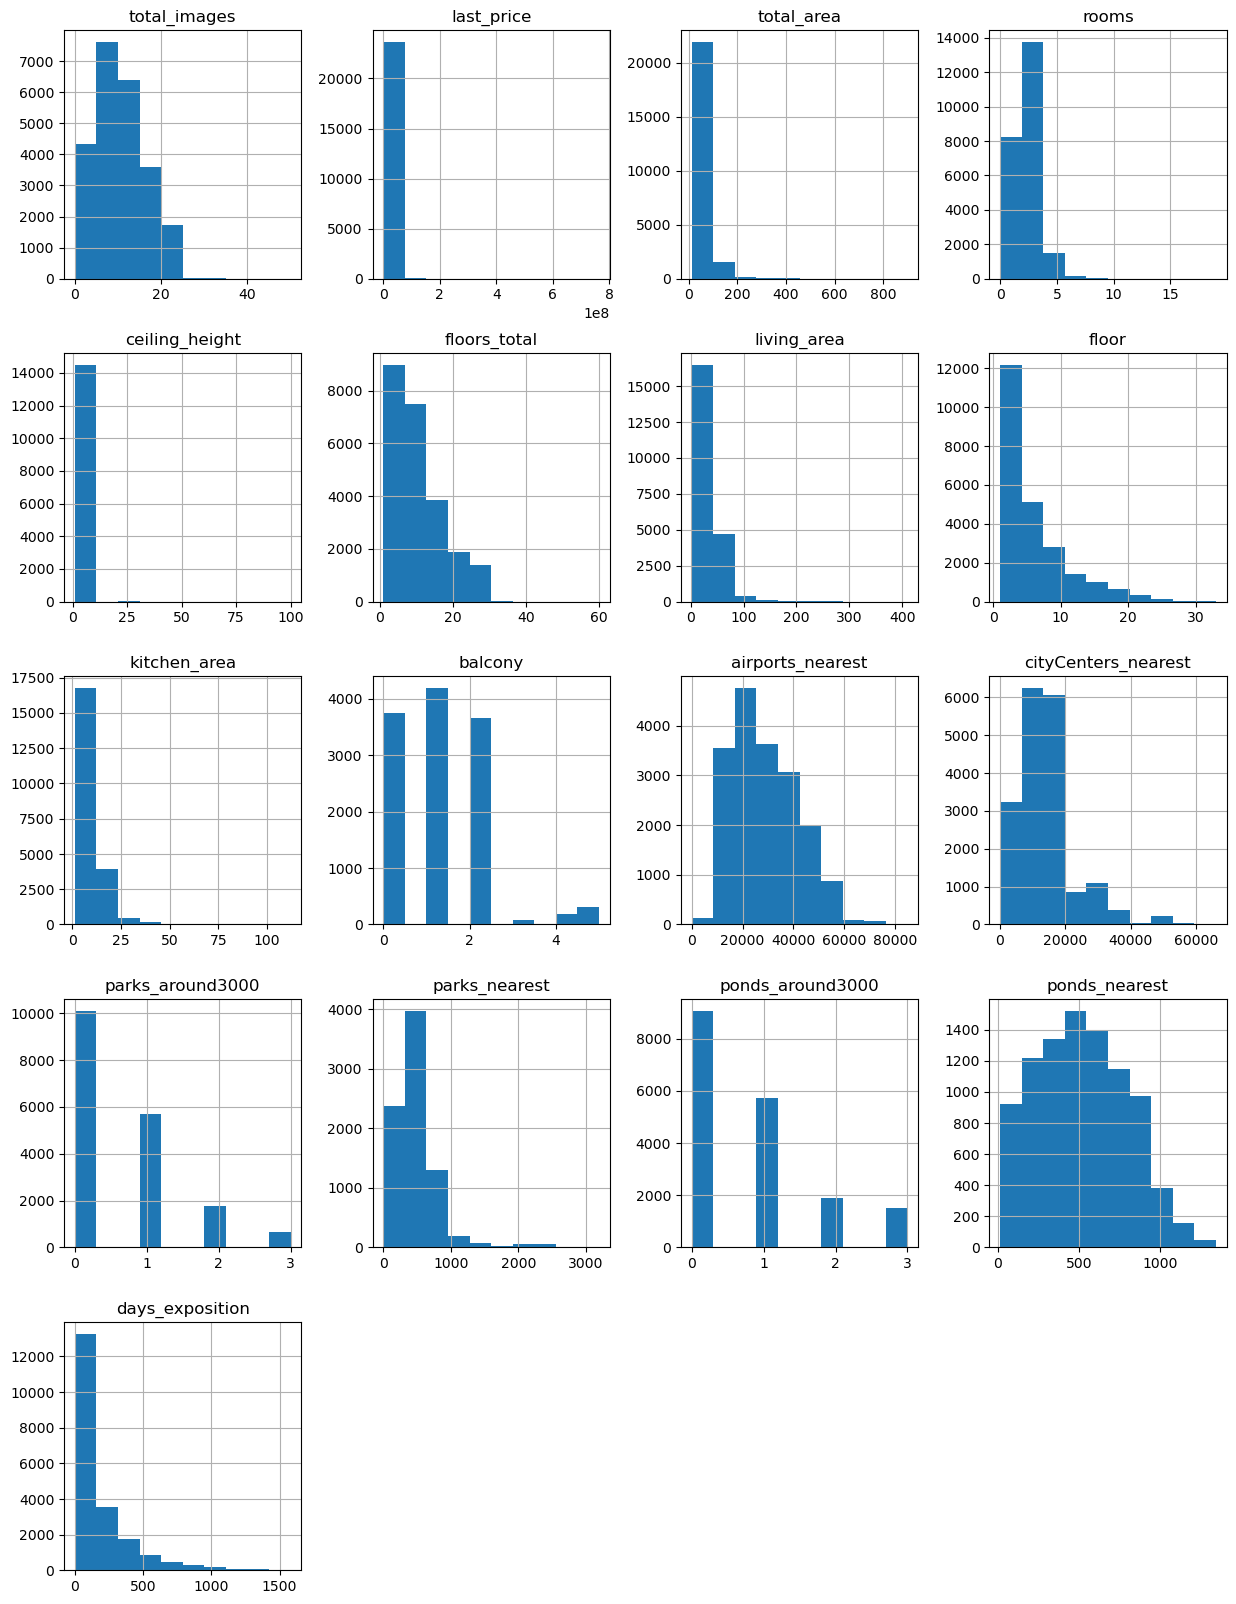

In [5]:
#Построим общую гистограмму для всех числовых столбцов таблицы
spb_realty.hist(figsize=(15, 20))

На некоторых гистограммах (например *last_price*,*ceiling_height* и др.) графики заметно смещены к оси ординат, что скорее всего свидетельствует о наличии выбросов в данных. В дальнейшем необходимо будет это проверить

**Вывод:**  

В базе представлены 23699 записи. В данных присутсвуют пропуски и аномальные значения, требующие корректировки.  Для ряда столбцов указан не корректный тип данных.

# Предобработка данных

## Изучим и заполним пропущенные значения

In [6]:
#проверим наличие явных дубликатов
print('\nЧисло явных дубликатов:', spb_realty.duplicated().sum())


Число явных дубликатов: 0


<AxesSubplot:>

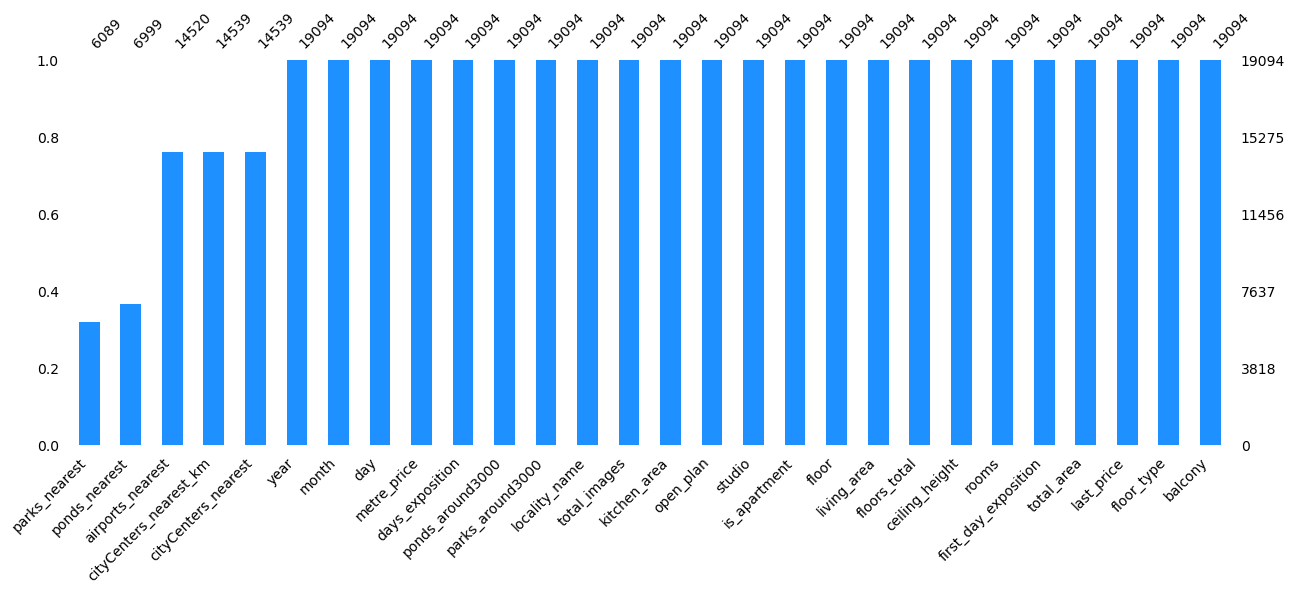

In [67]:
#проверим наличие пропусков
msno.bar(spb_realty,color="dodgerblue", sort="ascending", figsize=(15,5), fontsize=10)

In [8]:
#проверим наличие пропусков
spb_realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

В данных присутсвует занчительное количество пропусков. Причем это характерно как для введенных пользователями сведений, так и картографическим сведениям. 

Собственники квартир пропускают поля, значение которых точно не знают, либо умышленно не указывают некоторые характеристики (например, кухня 6 метров - скорее минус). 

Кроме того, могут иметь место ошибки автоматизированных систем заполнения информации. Причины пропуска картографических сведений стоит обсудить с разработчиками.

Рассмотрим столбцы с пропусками, изучим причины их появления и попробуем заполнить недостающие данные там, где это возможно. Удалим сведения, которые невозможно восстановить и которые помешают дальнейшему анализу

In [9]:
#заполним пропуски в столбце living_area и kitchen_area (медианой по количеству комнат)
print("Количество пропусков до заполнения",spb_realty['living_area'].isna().sum())

for room_num in spb_realty['rooms'].unique():
    median_living = spb_realty.loc[spb_realty['rooms'] == room_num, 'living_area'].median()

    spb_realty.loc[(spb_realty['living_area'].isna()) & (spb_realty['rooms']==room_num),'living_area'] = median_living
    
print("Количество пропусков после заполнения",spb_realty['living_area'].isna().sum())

Количество пропусков до заполнения 1903
Количество пропусков после заполнения 0


In [10]:
print("Количество пропусков до заполнения",spb_realty['kitchen_area'].isna().sum())

for room_num in spb_realty['rooms'].unique():
    median_kitchen = spb_realty.loc[spb_realty['rooms'] == room_num, 'kitchen_area'].median()
    
    #print(room_num, median_kitchen)

    spb_realty.loc[(spb_realty['kitchen_area'].isna()) & (spb_realty['rooms']==room_num),'kitchen_area'] = median_kitchen
    
print("Количество пропусков после заполнения",spb_realty['kitchen_area'].isna().sum())

Количество пропусков до заполнения 2278
Количество пропусков после заполнения 197


In [11]:
#выясним, для какокго количества комнат какое количество значений пропущено
#Как оказалась все пропуски для квартир с параметорм kitchen_area==0
print(spb_realty.loc[spb_realty['kitchen_area'].isna(),['rooms']].value_counts())

#заполним оставшиеся пропуски медианой по всей выборке
spb_realty['kitchen_area'].fillna(spb_realty['kitchen_area'].median(), inplace=True)
print('Осталось пропусков в столбце kitchen_area ',spb_realty['kitchen_area'].isna().sum())

rooms
0        197
dtype: int64
Осталось пропусков в столбце kitchen_area  0


**Столбец is_apartment.** 
Заменим пропущенные значения высоты в столбце is_apartment (20924) на значение *False*. Исходим из того, что если собственнник не указал данный параметр, значит жилое помещение не является апартаментами

In [12]:
spb_realty['is_apartment'].fillna(False, inplace=True)
print('Осталось пропусков в столбце is_apartment ',spb_realty['is_apartment'].isna().sum())

Осталось пропусков в столбце is_apartment  0


**Столбцы balcony, parks_around3000, ponds_around3000.** Заменим пропущенные значения в столбце balcony (11519) на значение "0". Исходим из того, что если собственнник не указал  данный параметр, значит балконов в помещении нет. Аналогично поступим с параметрами parks_around3000 (5518) и ponds_around3000 (5518) 

In [13]:
#заменим пропуски в столбце balcony
spb_realty['balcony'].fillna(False, inplace=True)
print('Осталось пропусков в столбце balcony ',spb_realty['balcony'].isna().sum())

#заменим пропуски в столбце parks_around3000
spb_realty['parks_around3000'].fillna(0, inplace=True)
print('Осталось пропусков в столбце parks_around3000',spb_realty['parks_around3000'].isna().sum())

#заменим пропуски в столбце ponds_around3000
spb_realty['ponds_around3000'].fillna(0, inplace=True)
print('Осталось пропусков в столбце ponds_around3000',spb_realty['ponds_around3000'].isna().sum())

Осталось пропусков в столбце balcony  0
Осталось пропусков в столбце parks_around3000 0
Осталось пропусков в столбце ponds_around3000 0


**Столбцы locality_name, floors_total.** Удалим строки с пропусками в столбце locality_name (49). Без этих данных не понятно к какому населенному пункту будут относится остальные параметры. 

Так же поступим с пропускамми в столбце floors_total (86). Так как заполнить этажность медианой по населенному пункту или другим параметрам будет не правильно (а вотдельных случаях невозможно, так как для многих поселков представлено единственное объявление на продажу). Строения разной высотности могут встречаться в разных районах, на разном удалении от центра и т.д. При этом для небольших поселков это может привести к изменению свойств выборки по населенному пункту.

В целом необходимо провести углубленный анализ  параметра этажности и найти способ восстановления недостающей информации. Однако, в случае нашего исследования, принимая во внимание небольшое количество пропусков, просто удалим проблемные объекты. Таких значений не так много и они не окажут решающего влитяния на статистику всей выборки.

In [14]:
spb_realty.dropna(subset=['locality_name', 'floors_total'], inplace=True)
print('Осталось пропусков в locality_name ',spb_realty['locality_name'].isna().sum())
print('Осталось пропусков в floors_total ',spb_realty['floors_total'].isna().sum())

Осталось пропусков в locality_name  0
Осталось пропусков в floors_total  0


 **Столбец first_day_exposition.** Приведем дату к формату %Y-%m-%d

In [15]:
spb_realty['first_day_exposition'] = pd.to_datetime(spb_realty['first_day_exposition'], format='%Y-%m-%d')

**Столбцы days_exposition.** В данных присутсвуют пропуски в столбце с количеством дней, которое объявление находилось в продаже (days_exposition). Не ясно являются ли пропуски результатом ошибки или они свидетельствуют о том, что объявления до сих пор остается активным.
На данные пропуски стоит обратить внимание разработчиков. 
    
Попробуем разобраться в причинах пропусков

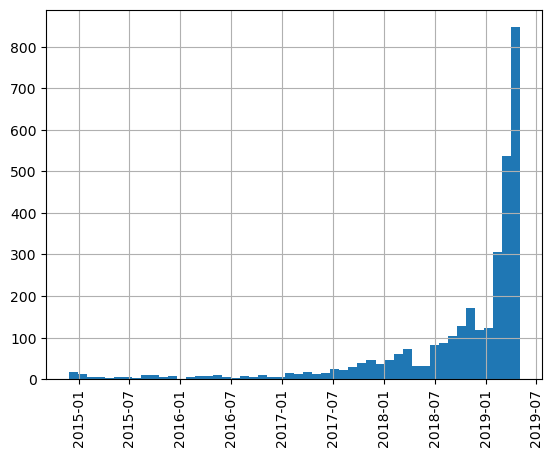

In [16]:
spb_realty.query('days_exposition.isna()')['first_day_exposition'].hist(bins=50)
plt.xticks(rotation='vertical')
plt.show()

Видно, что количество пропусков чаще встречаются у более новых объявлений - скорее всего пропуски в поле days_exposition означают, что объявление еще остается активным. 

Оставим такие пропуски без изменений

**Столбец ceiling_height.**  Многие пользователи не знают точную высоту потолков. С учетом того, что разброс в этих данных не может быть большим, заполним их медианой

In [17]:
#заполним пропуски в столбце ceiling_height
spb_realty['ceiling_height'].fillna(spb_realty['ceiling_height'].median(), inplace=True)
print('Осталось пропусков в столбце ceiling_height ',spb_realty['ceiling_height'].isna().sum())

Осталось пропусков в столбце ceiling_height  0


Еще раз убедимся, что все возможные пропущенные значения заполнены

In [18]:
#проверим наличие пропусков
spb_realty.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5524
cityCenters_nearest      5501
parks_around3000            0
parks_nearest           15535
ponds_around3000            0
ponds_nearest           14529
days_exposition          3171
dtype: int64

## Приведем данные к корректным типам

Для столбцов balcony, floors_total, days_exposition, parks_around3000, ponds_around3000 необходимо изменить тип данных с float64 на int64, так как количество балконов, этажей, прудов и парков неподалеку, а также дней в продаже должно быть целым числом

In [19]:
# преобразуем тип данных, где необходимо с float64 на int64
for column in ['balcony', 'floors_total','parks_around3000','ponds_around3000']:
    spb_realty[column] = spb_realty[column].astype('int')

#проверим результат преобразования
spb_realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       
 13  balcony         

## Устраним неявные дубликаты

**Столбец locality_name.** В названиях населенных пунктах присутсвуют разночтения в именовании, в результате чего одни и те же  населенные пункты записаны по разному несколько раз, например:
- "городской поселок" и "поселок"
- "поселок городского типа" и "поселок"
- "посёлок" и "поселок"
Устраним эти разночтения

In [20]:
#функция устраняет неточности в именовании населенных пунктов, заменяя именования
#"городской поселок", "поселок городского типа" "поселок" и "посёлок" на "поселок" 
#на вход подается наменование населенного пункта
#возвращается новое наименование
def unify_locality_name(locality):

    #заменяем все 'ё'
    if 'ё' in locality:
        locality = locality.replace('ё','е')

    #заменяем подстроку "поселок городского типа"
    if 'поселок городского типа' in locality:
        locality = locality.replace('поселок городского типа','поселок')
    
    #заменяем подстроку "городской поселок"        
    if 'городской поселок' in locality:
        locality = locality.replace('городской поселок','поселок')
    
    return locality     

spb_realty['locality_name'] = spb_realty['locality_name'].apply(unify_locality_name)       

#проверим результат преобразования
print(spb_realty['locality_name'].value_counts())

Санкт-Петербург                                            15651
поселок Мурино                                               552
поселок Шушары                                               439
Всеволожск                                                   398
Пушкин                                                       369
Колпино                                                      338
поселок Парголово                                            327
Гатчина                                                      307
деревня Кудрово                                              299
Выборг                                                       237
Петергоф                                                     201
Сестрорецк                                                   183
Красное Село                                                 176
Кудрово                                                      171
деревня Новое Девяткино                                      143
Сертолово                

## Устраним редкие и выбивающиеся значения ####

In [21]:
# Изучим данные
spb_realty.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23565.000000,2.356500e+04,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,23565.000000,18041.000000,18064.000000,23565.000000,8030.000000,23565.000000,9036.000000,20394.000000
mean,9.878421,6.540058e+06,60.322824,2.070656,2.724530,10.675875,34.324580,5.878124,10.447143,0.593677,28797.082701,14192.656056,0.468831,490.580448,0.589900,518.289509,180.741395
std,5.681156,1.091093e+07,35.657060,1.078591,0.991026,6.594823,21.721222,4.871485,5.642793,0.960660,12632.499735,8613.348153,0.748403,341.572956,0.883966,278.009558,219.732782
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.600000,5.000000,18.400000,2.000000,7.300000,0.000000,18565.000000,9238.000000,0.000000,288.000000,0.000000,293.000000,45.000000
50%,9.000000,4.646000e+06,52.000000,2.000000,2.650000,9.000000,30.300000,4.000000,9.040000,0.000000,26757.000000,13096.500000,0.000000,455.000000,0.000000,503.000000,95.000000
75%,14.000000,6.790000e+06,69.700000,3.000000,2.700000,16.000000,42.700000,8.000000,11.500000,1.000000,37273.000000,16285.000000,1.000000,612.000000,1.000000,730.000000,231.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Сопоставив результат работы функции describe с гистограммами параметров, построенных на шаге 1 исследования можно отметить наличие следующих проблем:
- во многих столбцах присутсвуют выбросы
- в ряде столбцов присутсвуют аномальные значения, например высота потолка 100 м явно не правдоподобна

**Ищем выбросы в столбце total_price**

In [22]:
#изучим сведения о столбце total_area
spb_realty['last_price'].describe()

count    2.356500e+04
mean     6.540058e+06
std      1.091093e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.646000e+06
75%      6.790000e+06
max      7.630000e+08
Name: last_price, dtype: float64

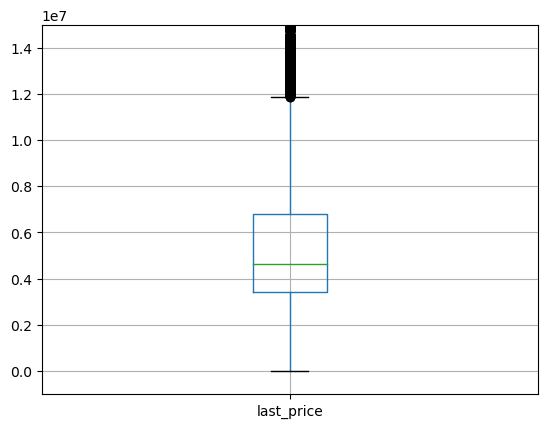

In [23]:
#Построим  диаграмму размаха
plt.ylim(-1000000, 15000000)
spb_realty.boxplot('last_price')
plt.show()

- Большая часть значений лежит в диапазоне от 3.4 до 6.8 млн, что выглядит правдоподобно.
- Нормальные значения расположены в диапазоне от 0 до 12 млн. При этом минимальная стоимость квартиры - порядка 12 тыс. рублей. Квартира в Ленинградской области не может стоить так дешево - скорее всего имеем дело с ошибкой. Необходимо проверить данные
- Значения, лежащие за пределами нормальной области считаем выбросами

Проверим минимальные стоимости квартир

In [24]:
#проверим минимальные стоимости квартир
print(spb_realty[['last_price','locality_name']].sort_values('last_price'))

        last_price          locality_name
8793       12190.0        Санкт-Петербург
17456     430000.0                 Сланцы
14911     430000.0  поселок станции Свирь
16274     440000.0     деревня Старополье
9581      450000.0     деревня Старополье
...            ...                    ...
15651  300000000.0        Санкт-Петербург
1436   330000000.0        Санкт-Петербург
14706  401300000.0        Санкт-Петербург
19540  420000000.0        Санкт-Петербург
12971  763000000.0        Санкт-Петербург

[23565 rows x 2 columns]


Очевидно значение цены 12190 для Санкт-Петербурга ошибочно. В данном случае логично предположить, что пользователь имел ввиду 12 190 000. Данное значение выходит за диапазон нормальных и будет рассматриваться, как выброс. 

Обозначим в качестве нижнее границы отсечения 430000 - минимальную стоимость жилья. Верхнюю границу оставим на уровне 12 млн. Отсечем выбросы, построим гистограмму

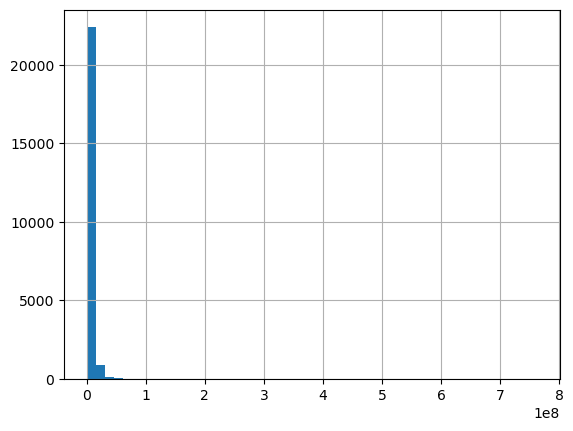

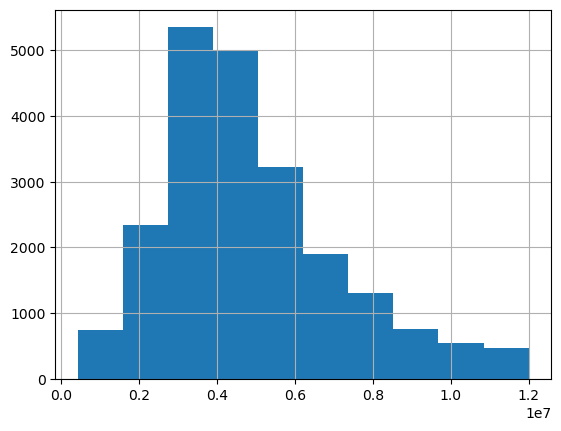

In [25]:
# Исходные данные
spb_realty['last_price'].hist(bins=50)
plt.show()
# Данные без выбросов
spb_realty.query('last_price >= 430000 and last_price <= 12000000')['last_price'].hist()
plt.show()

Типичная квартира в Питере и области стоит 3-5 млн. Видимо база не совсем свежая :)

**Ищем выбросы в столбце total_area**

In [26]:
#изучим сведения о столбце total_area
spb_realty['total_area'].describe()

count    23565.000000
mean        60.322824
std         35.657060
min         12.000000
25%         40.000000
50%         52.000000
75%         69.700000
max        900.000000
Name: total_area, dtype: float64

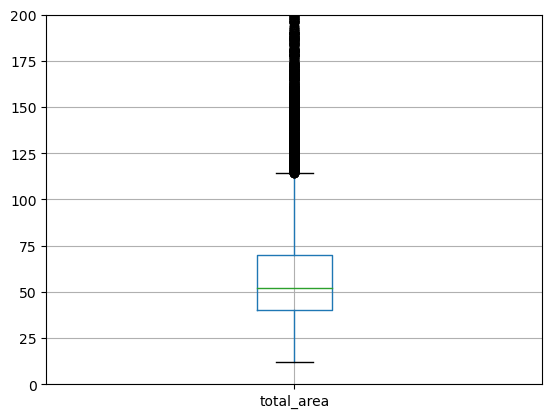

In [27]:
#Построим  диаграмму размаха
plt.ylim(0, 200)
spb_realty.boxplot('total_area')
plt.show()

- Большая часть значений лежит в диапазоне от 40 до 70 кв.м., что выглядит правдоподобно.
- Нормальные значения расположены в диапазоне от 12 до 115 кв.м. 
- Значения, лежащие за пределами нормальной области считаем выбросами

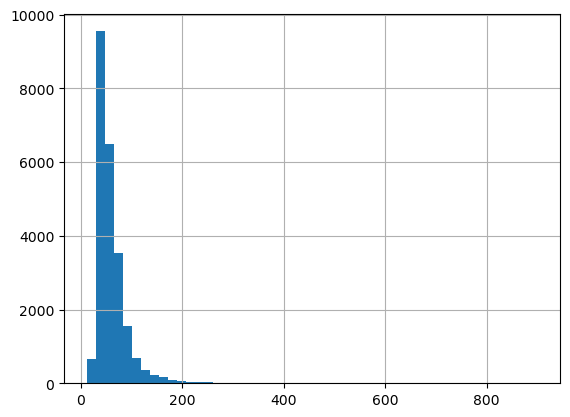

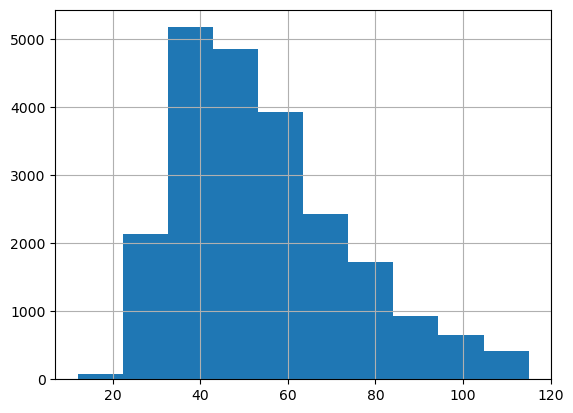

In [28]:
# Исходные данные
spb_realty['total_area'].hist(bins=50)
plt.show()

# Данные без выбросов
spb_realty.query('total_area >= 12 and total_area <= 115')['total_area'].hist()
plt.show()


Самая распространенная площадь квартир 35-55 кв.м - в тесноте, да не в обиде!

**Ищем выбросы в столбце rooms**

In [29]:
#изучим сведения о столбце rooms
spb_realty['rooms'].describe()

count    23565.000000
mean         2.070656
std          1.078591
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

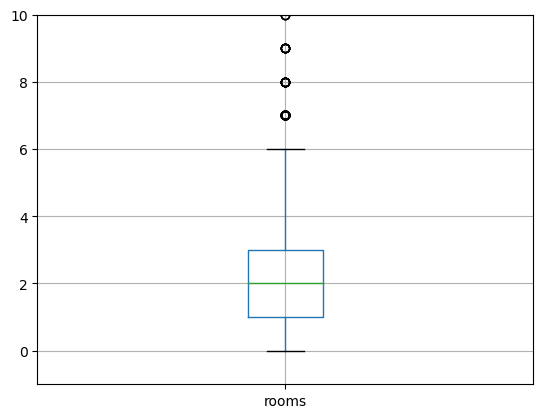

In [30]:
#Построим  диаграмму размаха
plt.ylim(-1, 10)
spb_realty.boxplot('rooms')
plt.show()

- Большая часть значений лежит в диапазоне от 1 до 3 комнат, что выглядит правдоподобно.
- Нормальные значения расположены в диапазоне от 0 до 6 комнат. Значение ноль комнат кажется подозрительным: либо собственники имели ввиду студии, либо имеет место ошибка.Таких значений не так много и они не должны критически  повлиять на результаты нашего исследования. Вместе с тем целесообразно сообщить о данной ситуации разработчикам, чтобы они уточнили происхождение тааких данных
- Значения, лежащие за пределами нормальной области считаем выбросами

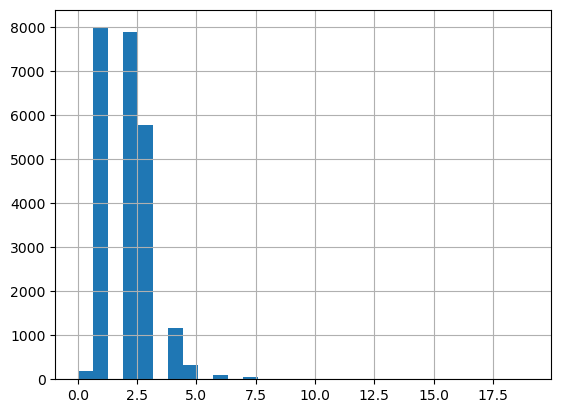

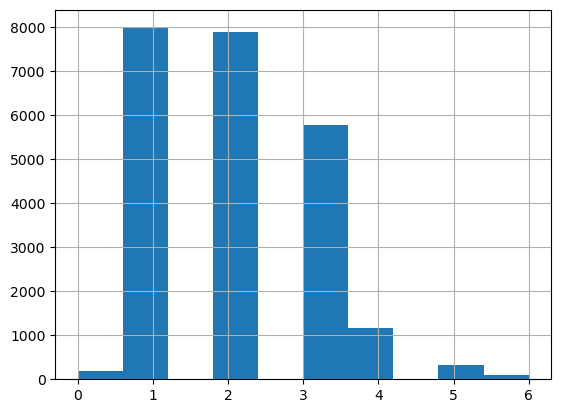

In [31]:
# Исходные данные
spb_realty['rooms'].hist(bins=30)
plt.show()

# Данные без выбросов
spb_realty.query('rooms >= 0 and rooms <= 6')['rooms'].hist()
plt.show()


Наибольшей популярностью ожидаемо пользуются однушки и двушки

**Ищем выбросы в столбце ceiling_height**

In [32]:
#изучим сведения о столбце total_area
spb_realty['ceiling_height'].describe()

count    23565.000000
mean         2.724530
std          0.991026
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

In [33]:
#посмотрим на максимальные значения высоты потолка
spb_realty['ceiling_height'].sort_values(ascending=False)

22869    100.00
3148      32.00
22336     32.00
21377     27.50
5807      27.00
          ...  
2572       2.00
552        2.00
16934      1.75
5712       1.20
22590      1.00
Name: ceiling_height, Length: 23565, dtype: float64

Есть целый ряд значений свыше 25 метров - похоже на ошибку. Вероятно, что пользователи допустили неточность при вводе и имели ввиду высоту потолка 2.5 м. Исправим неточности. (Значения высоты потолка меньше 2.5 по градостроительному кодексу быть не может. Поэтому значения до 25 метров игнорируем)

In [34]:
#функция преобразует значения высоты потолка больше 25 метров (делим на 10)
#на вход подается строка из базы данных квартир
#возвращает новое значение высоты потолка
def ceiling_height_correction(row):
    if row['ceiling_height']>=25:
        return row['ceiling_height']/10
    
    return row['ceiling_height']

#обновим значения высоты потолка
spb_realty['ceiling_height'] = spb_realty.apply(ceiling_height_correction,axis=1)

In [35]:
#изучим сведения о столбце ceiling_height
spb_realty['ceiling_height'].describe()

count    23565.000000
mean         2.701290
std          0.336237
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max         24.000000
Name: ceiling_height, dtype: float64

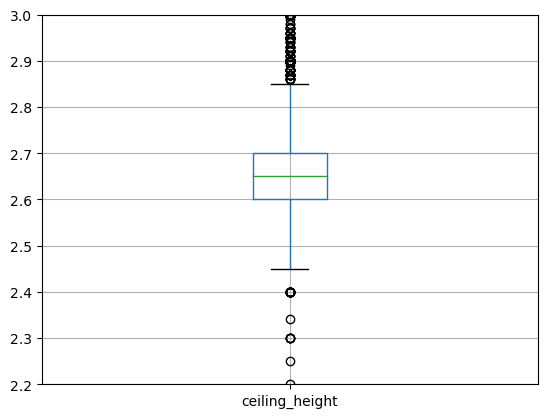

In [36]:
#Построим  диаграмму размаха
plt.ylim(2.2, 3)
spb_realty.boxplot('ceiling_height')
plt.show()

- Большая часть значений лежит в диапазоне от 2,6 до 2,7 м, что выглядит правдоподобно.
- Нормальные значения расположены в диапазоне от 2,45 до 2,85 м. По градостроительным нормам высота потолка в жилых помещениях должна быть выше 2.5 м. Все, что ниже - считаем ошибкой
- значения, лежащие за пределами нормальной области считаем выбросами. Не будем учитывать их при построении гистограммы


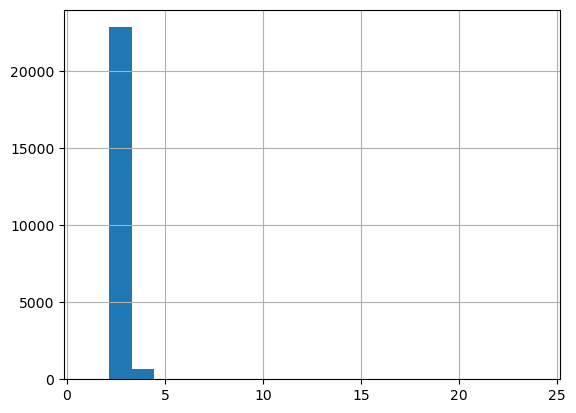

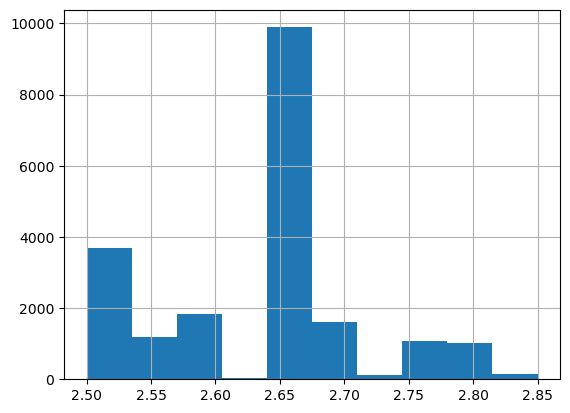

0

In [37]:
# Исходные данные
spb_realty['ceiling_height'].hist(bins=20)
plt.show()

# Данные без выбросов
spb_realty.query('(ceiling_height >= 2.5 and ceiling_height <= 2.85) or ceiling_height.isna()')['ceiling_height'].hist()
plt.show()

spb_realty['ceiling_height'].isna().sum()

В большинстве квартир потолки примерно 2,65 м. 


**Ищем выбросы в столбце days_exposition**

In [38]:
#изучим сведения о столбце days_exposition
spb_realty['days_exposition'].describe()

count    20394.000000
mean       180.741395
std        219.732782
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

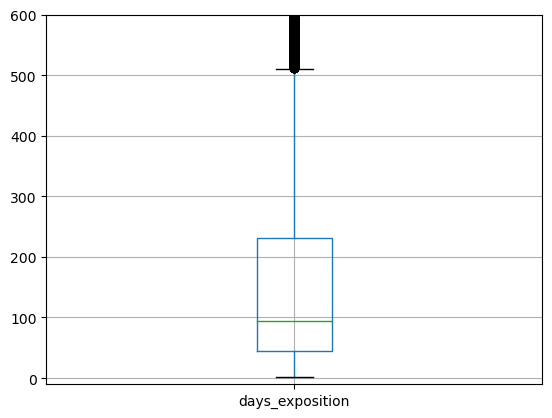

In [39]:
#Построим  диаграмму размаха
plt.ylim(-10, 600)
spb_realty.boxplot('days_exposition')
plt.show()


- Большая часть значений лежит в диапазоне от 45 до 231 дней, что выглядит правдоподобно.
- Нормальные значения расположены в диапазоне от 0 до 500 дней.
- Значения, лежащие за пределами нормальной области считаем выбросами


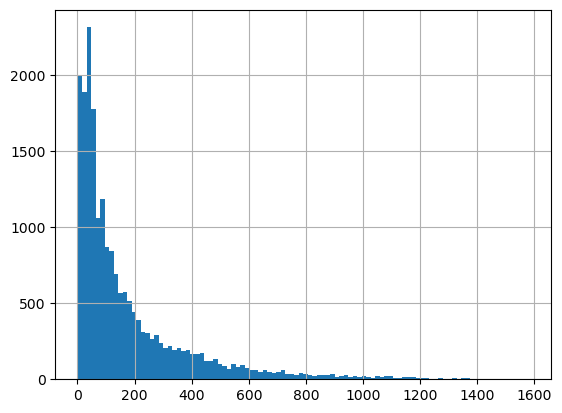

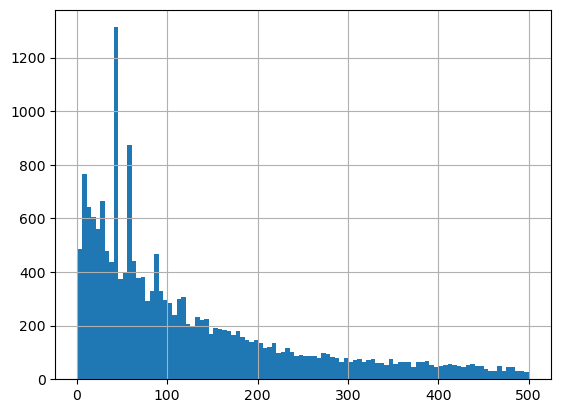

In [40]:
# Исходные данные
spb_realty['days_exposition'].hist(bins=100)
plt.show()

# Данные без выбросов
spb_realty.query('days_exposition >= 1 and days_exposition <= 500')['days_exposition'].hist(bins=100)
plt.show()


Обычно объявления о продаже остаются активными до 100 дней. На графике присутсвует пики в диапазоне 45 и 60 дней. Возможно это как-то связано со стандартыми пакетами размещений объявления сооответсвующей длительности (после которых пользователи не продлевют подписку и снимают объявление с продажи). Можно обсудить этот момент с разработчиками



Почистим данные. Удалим явные выбросы лежащие за пределами 99 квантиля


In [41]:
# Функция удаляет выбросы (выше 99 квантиля)
def clean_data(data, columns):
    
    for column in columns:
        q99 = data[column].quantile(0.99)
        
        data = data[data[column]<q99]
    
    return data

print('Статистика до чистки')
print(spb_realty.info())

#Столбцы с выбросами
columns_to_clean = ['last_price', 'total_area', 'rooms', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height']
columns_to_clean
#почистим данные в колонках columns_to_clean
spb_realty = clean_data(spb_realty, columns_to_clean)

print('Статистика после чистки')
print(spb_realty.info())

Статистика до чистки
<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  int64         
 7   living_area           23565 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          23565 non-null  float64       



Нам удалось сохранить значительную часть исходной информации, что позволит провести исследование 


## Добавим в таблицу новые признаки

- цена одного квадратного метра;
- день недели публикации объявления (0 — понедельник, 1 — вторник и так далее);
- месяц публикации объявления;
- год публикации объявления;
- тип этажа квартиры (значения — «первый», «последний», «другой»);
- расстояние до центра города в километрах.

In [42]:
#цена одного квадратного метра
spb_realty['metre_price'] = spb_realty['last_price']/spb_realty['total_area']

#день недели публикации объявления (0 — понедельник, 1 — вторник и так далее)
spb_realty['day'] = spb_realty['first_day_exposition'].dt.weekday
#месяц публикации объявления;
spb_realty['month'] = spb_realty['first_day_exposition'].dt.month
#год публикации объявления;
spb_realty['year'] = spb_realty['first_day_exposition'].dt.year

#функция делит квартиры по типу («первый», «последний», «другой»)
# Создаём функцию для заполнения нового столбца с типом этажа
def floor_type(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

#разобъем квартиры по типу
spb_realty['floor_type'] = spb_realty.apply(floor_type, axis=1)

#расстояние до центра города в километрах
spb_realty['cityCenters_nearest_km'] = round(spb_realty['cityCenters_nearest']/1000)

#проконтролируем результат обработки
spb_realty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19094 entries, 1 to 23697
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   total_images            19094 non-null  int64         
 1   last_price              19094 non-null  float64       
 2   total_area              19094 non-null  float64       
 3   first_day_exposition    19094 non-null  datetime64[ns]
 4   rooms                   19094 non-null  int64         
 5   ceiling_height          19094 non-null  float64       
 6   floors_total            19094 non-null  int64         
 7   living_area             19094 non-null  float64       
 8   floor                   19094 non-null  int64         
 9   is_apartment            19094 non-null  bool          
 10  studio                  19094 non-null  bool          
 11  open_plan               19094 non-null  bool          
 12  kitchen_area            19094 non-null  float6

# Проведем исследовательский анализ данных

Изучим следующие параметры объектов:
- общая площадь;
- жилая площадь;
- площадь кухни;
- цена объекта;
- количество комнат;
- высота потолков;
- этаж квартиры;
- тип этажа квартиры («первый», «последний», «другой»);
- общее количество этажей в доме;
- расстояние до центра города в метрах;
- расстояние до ближайшего аэропорта;
- расстояние до ближайшего парка;
- день и месяц публикации объявления.

## Изучим  параметры объектов:

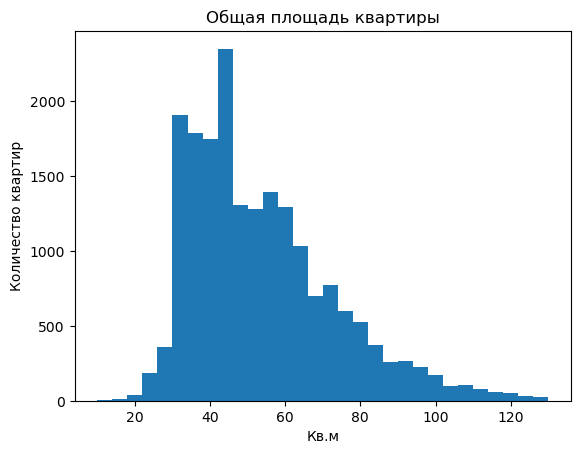

In [43]:
#общая площадью
plt.hist(spb_realty['total_area'], bins=30, range=(10,130))
plt.title('Общая площадь квартиры')
plt.xlabel('Кв.м')
plt.ylabel('Количество квартир')
plt.show()

Наиболее распространенная площадь квартир 35-45 метров.

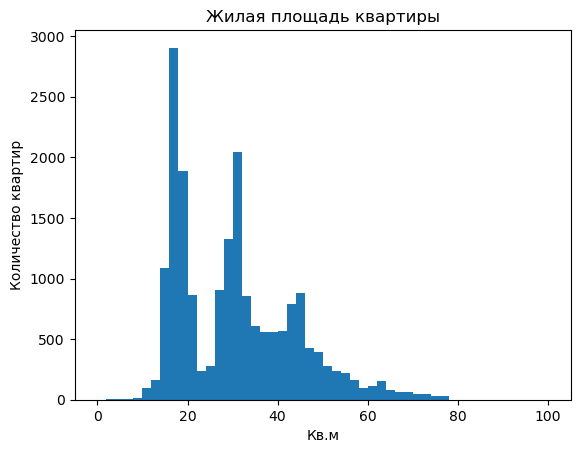

In [44]:
#жилая площадью
plt.hist(spb_realty['living_area'], bins=50, range=(0,100))
plt.title('Жилая площадь квартиры')
plt.xlabel('Кв.м')
plt.ylabel('Количество квартир')
plt.show()

В данных присутсвует два пика: 18 кв.м и 30 кв.м. Возможно это характерные площади для студий и однушек

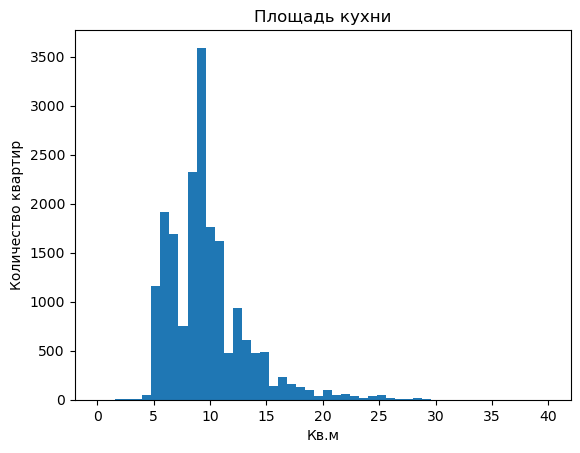

In [45]:
#площадью кухни
plt.hist(spb_realty['kitchen_area'], bins=50, range=(0,40))
plt.title('Площадь кухни')
plt.xlabel('Кв.м')
plt.ylabel('Количество квартир')
plt.show()

Типичная кухня в Питере и Ленобласти 10 кв.м. 

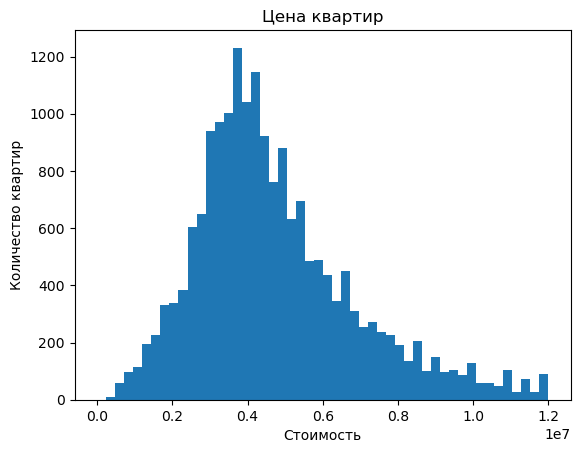

In [46]:
#цена объекта
plt.hist(spb_realty['last_price'], bins=50, range=(0,12000000))
plt.title('Цена квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Средняя цена квартиры в Питере и области - 4 млн.

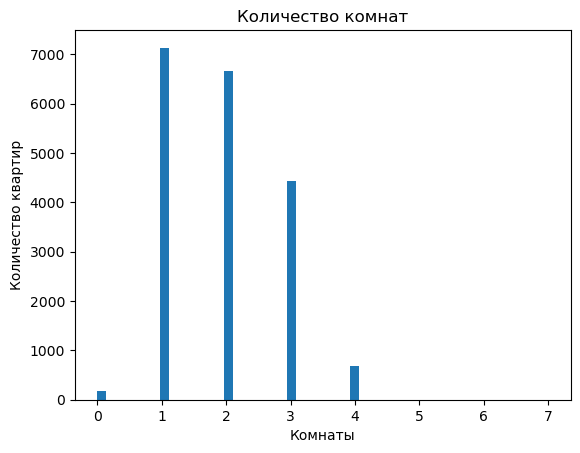

In [47]:
#количество комнат
plt.hist(spb_realty['rooms'], bins=50, range=(0,7))
plt.title('Количество комнат')
plt.xlabel('Комнаты')
plt.ylabel('Количество квартир')
plt.show()

Больше всего однушек и двушек

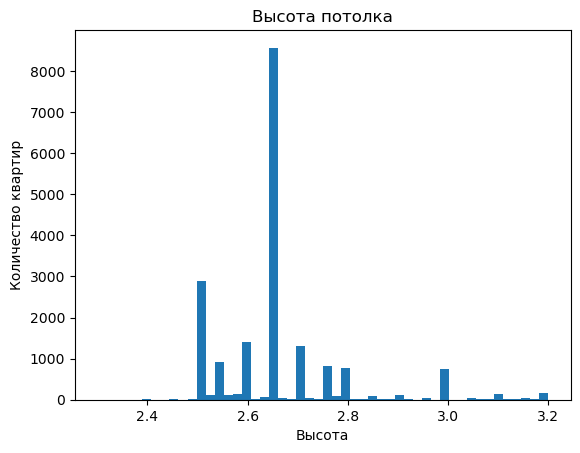

In [48]:
#высота потолка
plt.hist(spb_realty['ceiling_height'], bins=50, range=(2.3,3.2))
plt.title('Высота потолка')
plt.xlabel('Высота')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего потолок 2.7 м

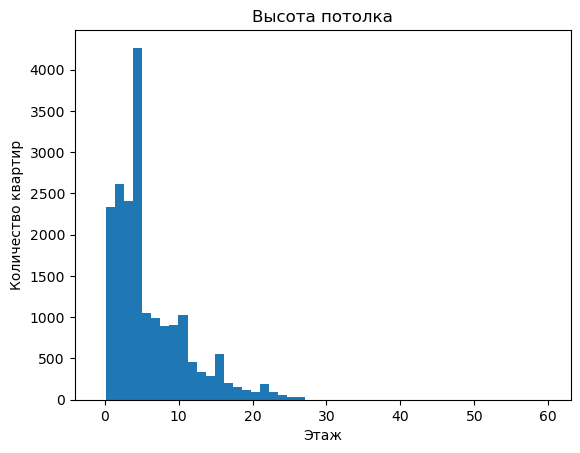

In [49]:
#этаж квартиры
plt.hist(spb_realty['floor'], bins=50, range=(-1,60))
plt.title('Высота потолка')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Большинство квартир расположено на 2-3 этаже. Опять же старая застройка

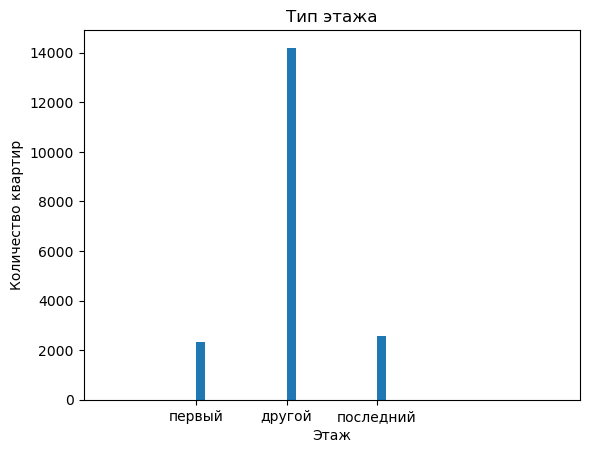

In [50]:
#тип этажа квартиры 
plt.hist(spb_realty['floor_type'], bins=50, range=(-1,4))
plt.title('Тип этажа')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()


Количество первых и последних этажей одинаково!!! :)) Капитан-очевидность в деле!

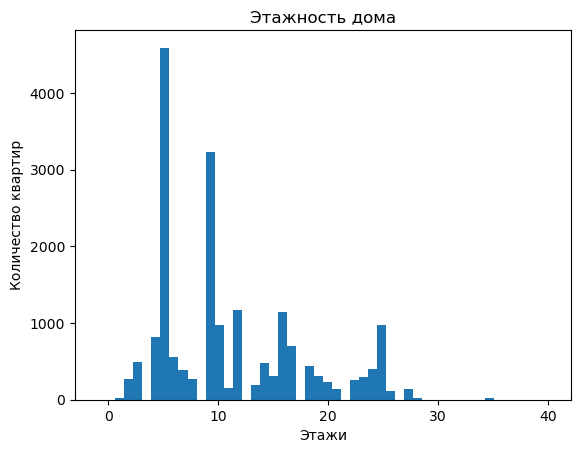

In [51]:
#общее количество этажей в доме
plt.hist(spb_realty['floors_total'], bins=50, range=(-1,40))
plt.title('Этажность дома')
plt.xlabel('Этажи')
plt.ylabel('Количество квартир')
plt.show()


В Питере больше всего квартир продают в пятиэтажках

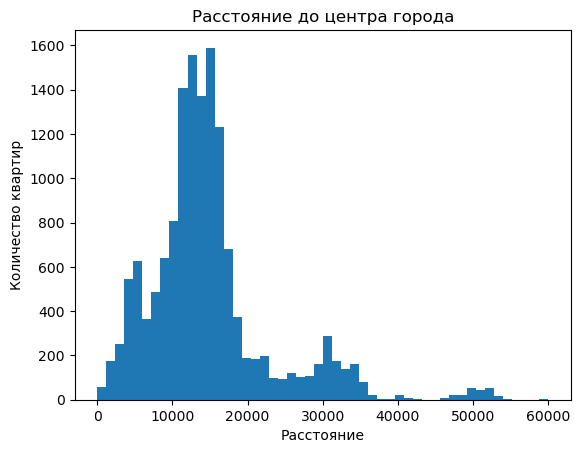

In [52]:
#расстояние до центра города в метрах
plt.hist(spb_realty['cityCenters_nearest'], bins=50, range=(-1,60000))
plt.title('Расстояние до центра города')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

В среднем расстояние от продаваемой квартиры до  центра города - 10-13 тыс. м. Большинство квартир продается на окраинах

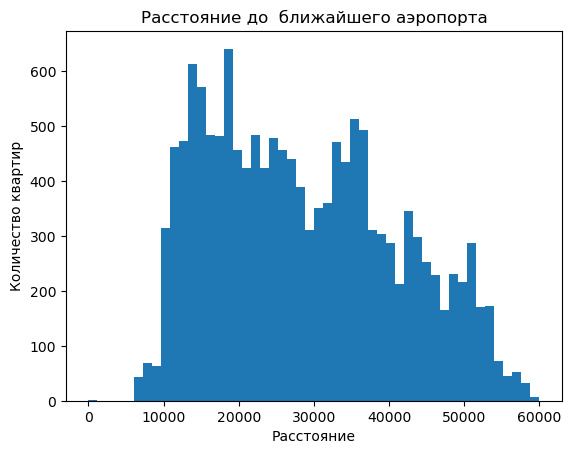

In [53]:
#расстояние до ближайшего аэропорта
plt.hist(spb_realty['airports_nearest'], bins=50, range=(-1,60000))
plt.title('Расстояние до  ближайшего аэропорта')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

До ближайшего аэропорта 11-20 км. Все дороги ведут в Пулково!

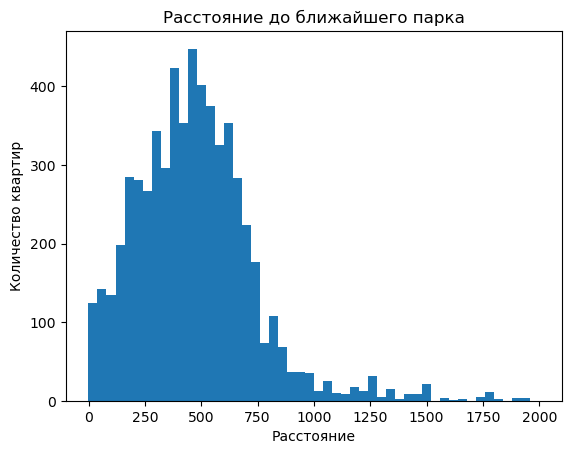

In [54]:
#расстояние до ближайшего аэропорта
plt.hist(spb_realty['parks_nearest'], bins=50, range=(-1,2000))
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние')
plt.ylabel('Количество квартир')
plt.show()

Расстояние до ближайшего парка в среднем метров 400. Гораздо ближе аэропорта!!!

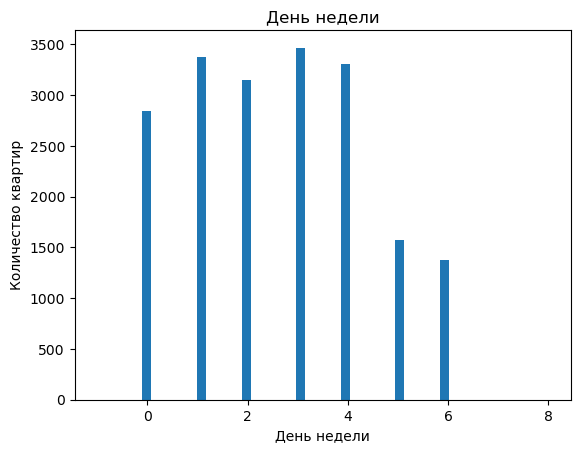

In [55]:
#день публикации объявления.
plt.hist(spb_realty['day'], bins=50, range=(-1,8))
plt.title('День недели')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

Объявления о продаже квратиры публикуют с понедельника по пятницу. Логично, в выходные надо отдыхать!

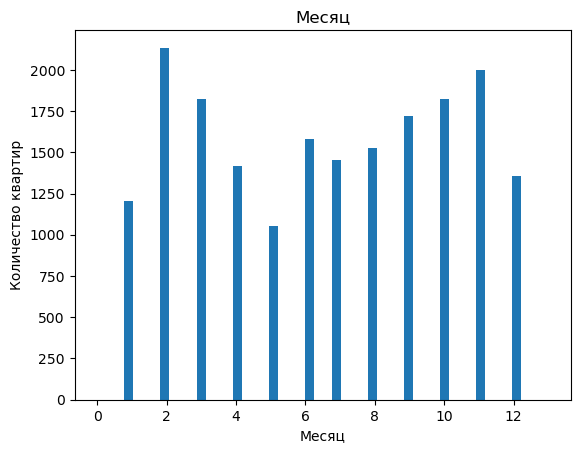

In [56]:
#месяц публикации объявления.
plt.hist(spb_realty['month'], bins=50, range=(0,13))
plt.title('Месяц')
plt.xlabel('Месяц')
plt.ylabel('Количество квартир')
plt.show()

Пик активности на рынке недвижимости - февраль-апрель

## Оценим время продажи квартиры:

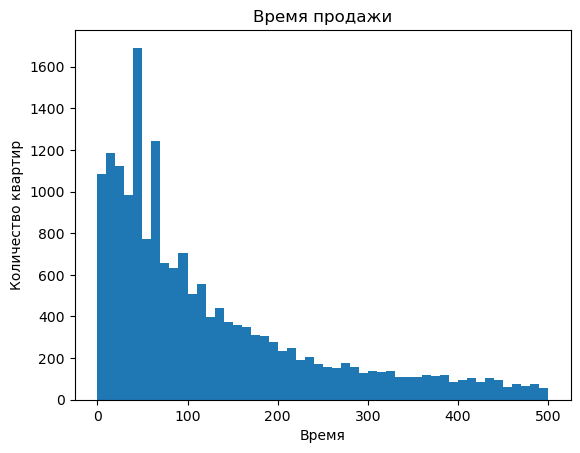

count    19094.000000
mean       164.557819
std        187.635858
min          1.000000
25%         44.000000
50%         91.000000
75%        216.000000
max       1047.000000
Name: days_exposition, dtype: float64

In [57]:
#месяц публикации объявления.
plt.hist(spb_realty['days_exposition'], bins=50, range=(0,500))
plt.title('Время продажи')
plt.xlabel('Время')
plt.ylabel('Количество квартир')
plt.show()

#выведем основные характеристики
spb_realty['days_exposition'].describe()


- Время продажи (медиана): 95 
- Время продажи (среднее): 140 

В среднем продажа квартиры занимает 140 дней. Медианное значение равняется 95 дням.
Продажа недвижимости за 45-75 дней считается быстрой.
Срок реализации объекта более 180 дней можно полагать долгим

## Оценим влияние различных фаторов на (полную) стоимость объекта

Изучим, зависимость цены от:
- общей площади;
- жилой площади;
- площади кухни;
- количества комнат;
- этажа, на котором расположена квартира (первый, последний, другой);
- даты размещения (день недели, месяц, год).

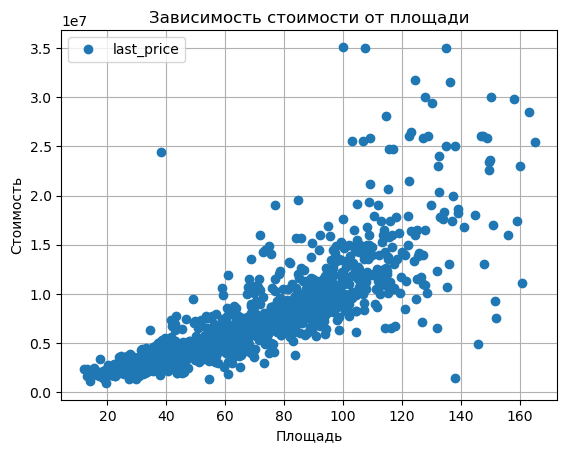

Корреляция цены и общей площади: 0.7307386420466557


In [58]:
# Зависимость стоимости от общей площади
(spb_realty
    .pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o')
)

plt.title('Зависимость стоимости от площади')
plt.xlabel('Площадь')
plt.ylabel('Стоимость')
plt.show()

print('Корреляция цены и общей площади:',spb_realty['last_price'].corr(spb_realty['total_area']))

Все логично - чем больше площадь, тем выше стоимость

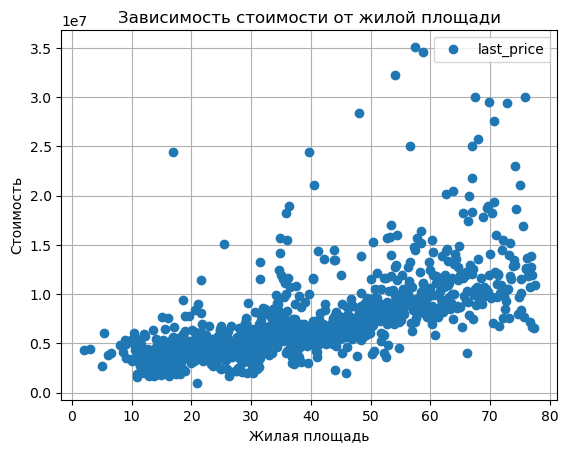

Корреляция цены и жилой площади: 0.5744200168320067


In [59]:
# Зависимость стоимости от жилой площади

(spb_realty
    .pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o')
)
plt.title('Зависимость стоимости от жилой площади')
plt.xlabel('Жилая площадь')
plt.ylabel('Стоимость')
plt.show()

print('Корреляция цены и жилой площади:',spb_realty['last_price'].corr(spb_realty['living_area']))

Зависимость чуть менее явная, но все же в целом чем болше жилая площадь квартиры, тем выше ее стоимость

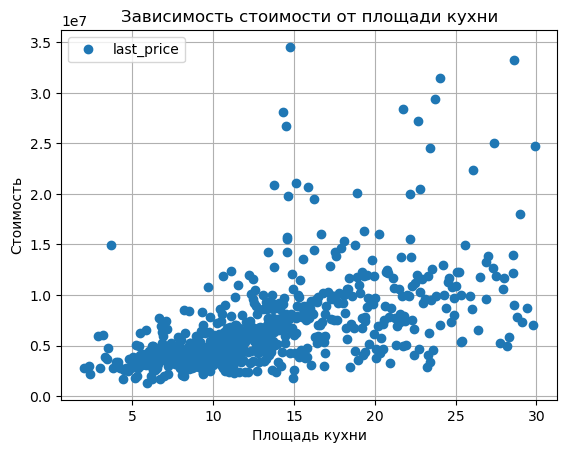

Корреляция цены и площади кухни: 0.5076098975541538


In [60]:
# Зависимость стоимости от площади кухни

(spb_realty
    .pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o')
)
plt.title('Зависимость стоимости от площади кухни')
plt.xlabel('Площадь кухни')
plt.ylabel('Стоимость')
plt.show()

print('Корреляция цены и площади кухни:',spb_realty['last_price'].corr(spb_realty['kitchen_area']))

Зависимость еще меньше, но все же прослеживается закономерность: чем болше площадь кухни, тем больше ее стоимость

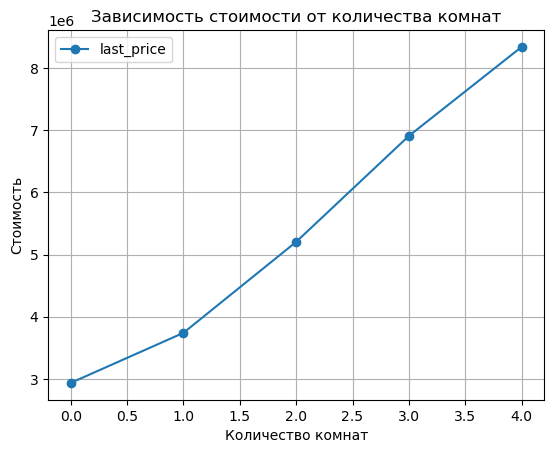

Корреляция стоимости и количества комнат: 0.4312390581153387


In [61]:
# Зависимость стоимости от количества комнат

(spb_realty
    .pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-')
)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Количество комнат')
plt.ylabel('Стоимость')
plt.show()

print('Корреляция стоимости и количества комнат:',spb_realty['last_price'].corr(spb_realty['rooms']))

Больше комнат - больше стоимость! 

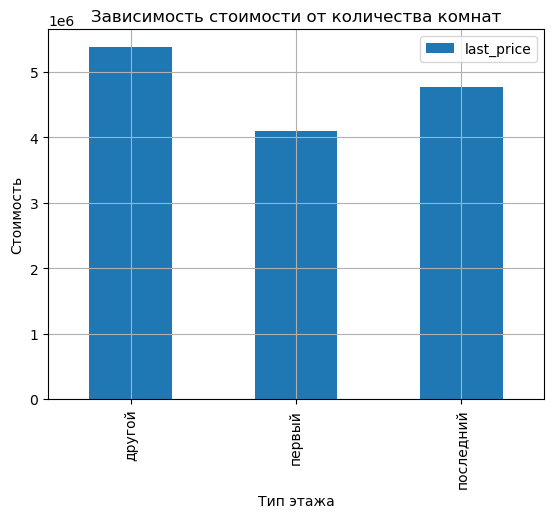

In [62]:
# Зависимость стоимости от этажа

(spb_realty
    .pivot_table(index='floor_type', values='last_price')
    .plot(grid=True, style='o-',kind='bar')
)
plt.title('Зависимость стоимости от количества комнат')
plt.xlabel('Тип этажа')
plt.ylabel('Стоимость')
plt.show()


Большинство покупателей не любят первые и последние этажи - на них цена ниже

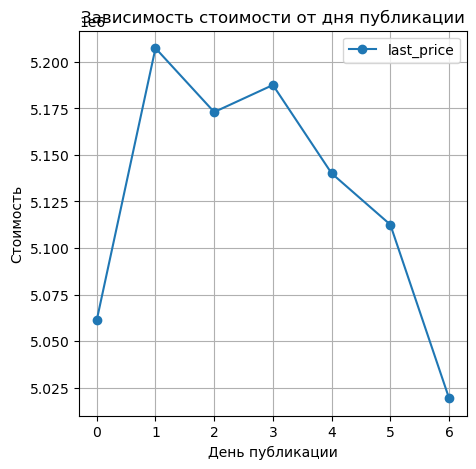

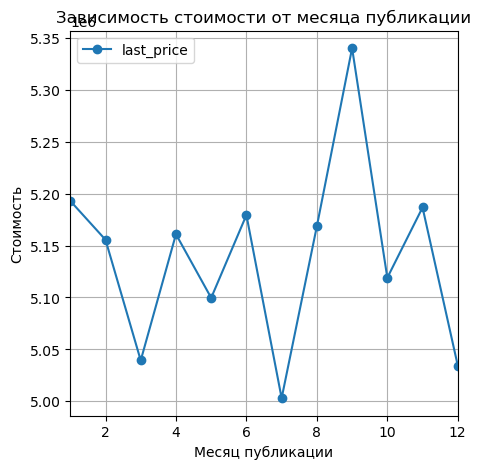

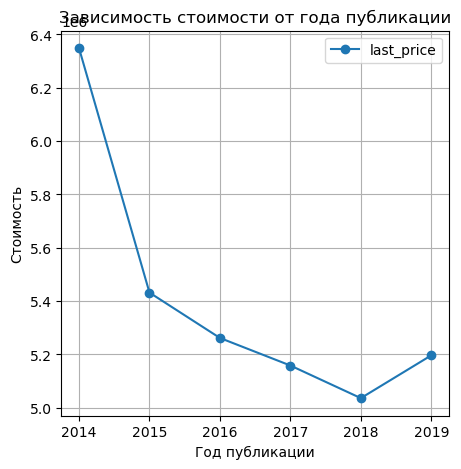

In [63]:
# Зависимость от дня размещения
(
    spb_realty.pivot_table(index='day', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости от дня публикации')
plt.xlabel('День публикации')
plt.ylabel('Стоимость')
plt.show()

# Зависимость от месяца размещения
(
    spb_realty.pivot_table(index='month', values='last_price')
    .plot(grid=True, style='o-', xlim=(1,12), figsize=(5, 5))
)
plt.title('Зависимость стоимости от месяца публикации')
plt.xlabel('Месяц публикации')
plt.ylabel('Стоимость')
plt.show()

# Зависимость от года размещения
(
    spb_realty.pivot_table(index='year', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.title('Зависимость стоимости от года публикации')
plt.xlabel('Год публикации')
plt.ylabel('Стоимость')
plt.show()


- Стоимость квартиры выше у объявлений, размещенных по вторникам, средам и четвергам (хоть и не значительно). По воскресеньям квартиры дешевле! 
- дешевле квартиры продают в июле. Пик стоимости - сентябрь (подожди два месяца и можно продать квартиру на  350 тыс. дороже... в среднем)
- заметно, что с 2014 года по 2018 год квартиры в Питере дешевели. В 2019 году наметилась тенденция к росту цен


## Оценим стоимость квадратного метра по населенным пунктам

In [64]:
# Оценим стоимость квадратного метра в 10 населкенных пунктах с наибольшим чисслом объявлением

top10_localities = list(spb_realty['locality_name'].value_counts().head(10).index)

(
    spb_realty.query('locality_name in @top10_localities')
    .pivot_table(index='locality_name', values='metre_price')
    .sort_values(by='metre_price', ascending=False)
)

,metre_price
locality_name,
Санкт-Петербург,108041.554920
Пушкин,101363.573776
деревня Кудрово,92515.918547
поселок Парголово,89591.387314
поселок Мурино,85832.521041
поселок Шушары,77843.079902
Колпино,74739.262318
Всеволожск,68377.874016
Гатчина,67901.317599


В Питере квадратный метр самый дорогой (логично). В Выборге – самый дешевый (среди населенных пунктво с максимальным числом объявлений).

## Оценим стоимость каждого километра в Санкт-Петербурге

<AxesSubplot:xlabel='cityCenters_nearest_km'>

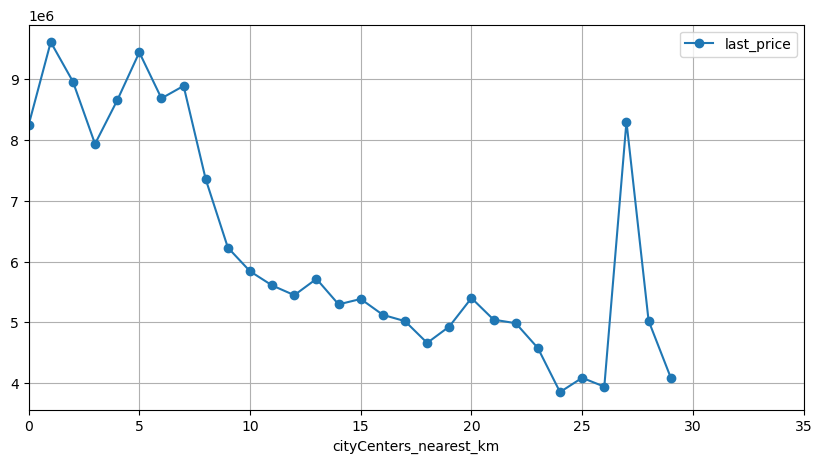

In [65]:
# построим график стоимости километра в Санкт-Петербурге
(
    spb_realty.query('locality_name == "Санкт-Петербург"')
    .pivot_table(index='cityCenters_nearest_km', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,35), figsize=(10, 5))
)

Чем ближе к центру, тем дороже. Также есть пик стоимости в районе 27 км от Центра. Возможно пригород с высокой стоимостью жилья


# Общий вывод

1) В ходе исследования изучили базу данных недвижимости Санкт-Петербурга и Ленобласти. По результатам первичной оценки были обнаружены выбросы в данных, а также наличие большого количества пропусков.

2) В процессе предобработки  часть пропущенных значений удалось восстановить. Некоторые данные, пропуски в которых восстановить не удалось,  были удалены. В результате удалось сохранить свыше 80% исходных данных.

3) С целью проведения исследования в данные были добавлены дополнительные столбцы, в том числе стоимость  квадратного метра; день, месяц и год публикации объявления; тип этажа квартиры («первый», «последний», «другой»)

4) В основной части исследования изучены основные характеристики объектов, а также их влияние на стоимость квартиры. 

Установлено, что:
- наиболее распространенная площадь квартир 35-45 метров.
- средняя цена квартиры в Питере и области - 4 млн.
- большинство квартир расположено на 2-3 этаже. 
- в среднем расстояние от продаваемой квартиры до центра города - 10-13 тыс. м.
- пик активности на рынке недвижимости - февраль-апрель
- с 2014 года по 2018 год квартиры в Питере дешевели. В 2019 году наметилась тенденция к росту цен
- в среднем квартиры продаются за 3 месяца

На стоимость квартир больше всего влияют следующие факторы:
- общая и жилая площадь квартиры
- количество комнат 
- расстояние до центра
- этажность (покупатели не любят первые и последние этажи)

5) В исходных данных присутсвует значительное количество пропусков как в пользовательских данных, так и в картографических сведениях. Необходимо совместно с разработчиками разобраться в причинах, проработать возможности решения имеющихся проблем.